***Question 1***

In [36]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Stage One dataset.csv') # Loading the dataset

In [9]:
A = [1,2,3,4,5]
B = [13,21,34]
np.array(A)
np.array(B)
K = np.append(A,B)
print(K)

[ 1  2  3  4  5 13 21 34]


***Question 2***

In [10]:
np.eye(3,3)
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

***Question 3***

In [18]:
df.columns.tolist()
k = df.groupby('fuel_type_code_pudl').agg(np.average)
k

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937


***Question 4***

In [21]:
df.describe().round(2) # performs a descriptive statistics and rounding them up to 2 decimal places


,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.00,29523.00,2.952300e+04,29523.00,29523.00,29523.00,29523.00
mean,118.60,2005.81,2.622119e+06,8.49,208.65,917.57,19.30
std,74.18,7.03,9.118004e+06,10.60,2854.49,68775.93,2091.54
min,1.00,1994.00,1.000000e+00,0.00,-276.08,-874.94,-41.50
25%,55.00,2000.00,1.381700e+04,1.02,5.21,3.78,1.94
50%,122.00,2006.00,2.533220e+05,5.76,26.00,17.37,4.13
75%,176.00,2012.00,1.424034e+06,17.01,47.11,42.14,7.74
max,514.00,2018.00,5.558942e+08,341.26,139358.00,7964521.00,359278.00


***Question 5***

In [26]:
df.skew()
k = df['fuel_qty_burned'].skew().round(2)
i = df['fuel_qty_burned'].kurt().round(2) 
data = (k, i)
print('The Skewness and Kurtosis of the "fuel_qty_burned" are %.2f, %.2f respectively' %(data) )

The Skewness and Kurtosis of the "fuel_qty_burned" are 15.85, 651.37 respectively


***Question 6***

In [33]:
df.isnull().any() #determining the feature with null value

df.isnull().sum() #Getting the sum of null values in each column

df['fuel_unit'].count() # Total number of rows for the column with the null value

# percentage = (total missing row / total rows) * 100
per_missing_rows = (180 / (df['fuel_unit'].count()))* 100

print('The percentage of missing rows i the column is', per_missing_rows)

The percentage of missing rows i the column is 0.6134342091810653


***Question 7***

In [34]:
k = df['fuel_unit']
k.dtype  # Gets the datatype for the column

dtype('O')

***Question 8***

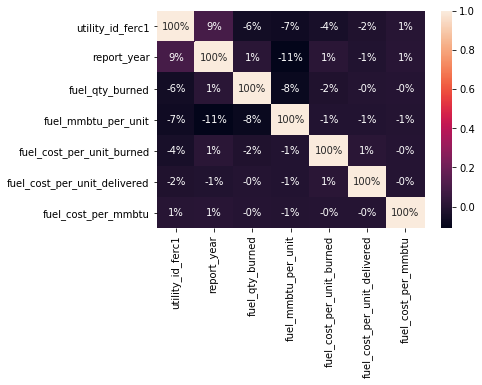

"fuel_qty_burned" and "fuel_mmbtu_per_unit" has the 2nd and 3rd least correlation with "fuel_cost_per_unit_burned"


In [41]:
sns.heatmap(df.corr(), annot=True, fmt='.0%')

plt.show()
print('"fuel_qty_burned" and "fuel_mmbtu_per_unit"', 'has the 2nd and 3rd least correlation with','"fuel_cost_per_unit_burned"')


***Question 9***

In [46]:
#Getting the sum of fuel cost per unit burned in 1994
w_df = df[(df['fuel_unit']=='ton') & (df['report_year']==1994 )].set_index('fuel_unit')
sum_of_1994_cost_per_unit_fuel= w_df['fuel_cost_per_unit_burned'].sum()

# GETTING THE SUM OF fuel cost per unit burned in 1998
r_df = df[(df['fuel_unit']=='ton') & (df['report_year']==1998 )].set_index('fuel_unit')
sum_of_1998_cost_per_unit_fuel= w_df['fuel_cost_per_unit_burned'].sum()
print(sum_of_1998_cost_per_unit_fuel, sum_of_1994_cost_per_unit_fuel)
r_df

Data = (sum_of_1994_cost_per_unit_fuel, sum_of_1998_cost_per_unit_fuel)
print("Sum of fuel_cost_per_unit_burned for year 1994 and 1998 is %f and %f, there's no obvious change" %(Data))

14884.154 14884.154
Sum of fuel_cost_per_unit_burned for year 1994 and 1998 is 14884.154000 and 14884.154000, there's no obvious change


***Question 10***

In [52]:
df.groupby('report_year').agg(np.average) #returns the average value of each column for a particular year of entry

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.120648,2.724018e+06,10.638098,213.191996,63.636060,3.086977
1995,110.139051,3.712067e+06,10.644830,354.422555,32.735269,2.868838
1996,108.714154,2.544754e+06,10.778041,79.434995,9196.705948,2.695880
1997,108.366545,2.813503e+06,10.247632,149.482132,11140.197239,3.113486
1998,109.845528,3.267453e+06,10.704964,126.683519,287.154420,2.775862
1999,108.222857,3.281281e+06,10.558885,120.053605,25.551627,2.740251
2000,111.083758,2.472032e+06,9.224475,237.797111,985.362877,4.208403
2001,113.521386,2.321402e+06,8.371469,133.013010,60.050396,4.612658
2002,120.354357,2.145645e+06,8.304833,101.179365,47.594361,6.226281
